NiftiImageIO (0x562cf323c5d0): /home/local/ASURITE/longchao/Desktop/project/GE_health/SegmentAsYouWish/data/1Pancreas/download/TCIA_pancreas_labels-02-05-2017/label0007.nii.gz has unexpected scales in sform

NiftiImageIO (0x562cf323c5d0): /home/local/ASURITE/longchao/Desktop/project/GE_health/SegmentAsYouWish/data/1Pancreas/download/TCIA_pancreas_labels-02-05-2017/label0007.nii.gz has unexpected scales in sform



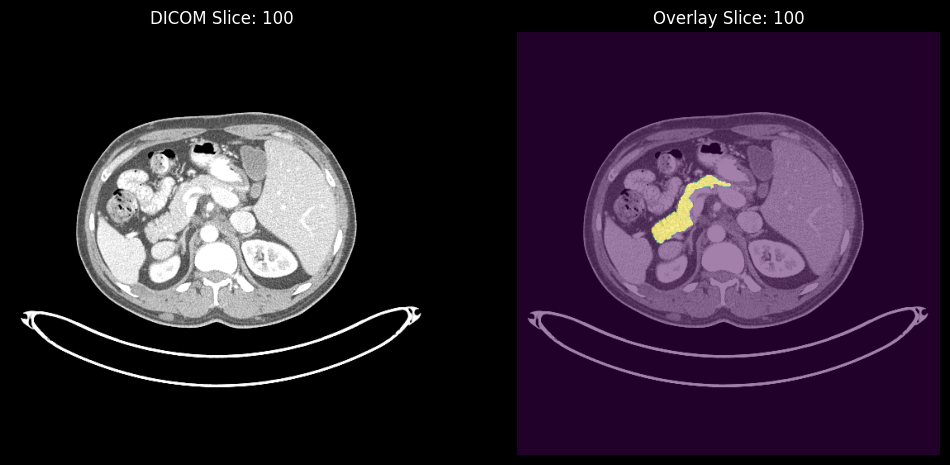

In [26]:
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt
import pydicom
from pydicom import dcmread
from skimage.transform import resize
import os
import nibabel as nib

def read_dicom_folder(folder_path):
    # Get all DICOM files in the folder
    dicom_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.dcm')]
    dicom_files.sort()  # Ensure files are in the correct order
    
    # Read all DICOM slices and stack them
    slices = [dcmread(dcm_file) for dcm_file in dicom_files]
    slices.sort(key=lambda x: float(x.ImagePositionPatient[2]))  # Sort by slice location
    image_data = np.stack([s.pixel_array for s in slices])
    
    return image_data

def adjust_image_slices(image_data, target_slices):
    current_slices = image_data.shape[0]
    if current_slices > target_slices:
        start_slice = (current_slices - target_slices) // 2
        adjusted_image_data = image_data[start_slice:start_slice + target_slices]
    elif current_slices < target_slices:
        pad_before = (target_slices - current_slices) // 2
        pad_after = target_slices - current_slices - pad_before
        adjusted_image_data = np.pad(image_data, ((pad_before, pad_after), (0, 0), (0, 0)), 'constant', constant_values=0)
    else:
        adjusted_image_data = image_data
    return adjusted_image_data

def show_dicom_and_nii_overlay(dicom_folder_path, label_nii_path, slice_id=None, lower_bound=-240.0, upper_bound=160.0):
    # Read the DICOM folder and NIfTI file
    dicom_data = read_dicom_folder(dicom_folder_path)
    label_sitk = sitk.ReadImage(label_nii_path)
    
    # Get the label data
    label_data = sitk.GetArrayFromImage(label_sitk)
    
    # Adjust the DICOM data to match the number of slices in the label
    dicom_data_aligned = adjust_image_slices(dicom_data, label_data.shape[0])

    # Adjust window width and level for the DICOM image
    dicom_data_pre = np.clip(dicom_data_aligned, lower_bound, upper_bound)
    dicom_data_pre = (dicom_data_pre - np.min(dicom_data_pre)) / (np.max(dicom_data_pre) - np.min(dicom_data_pre)) * 255.0
    dicom_data_pre = np.uint8(dicom_data_pre)
    
    # Select the slice
    if slice_id is None:
        slice_id = int(dicom_data_pre.shape[0] / 2)
    
    dicom_slice = dicom_data_pre[slice_id]
    label_slice = label_data[slice_id]
    
    # Resize DICOM image to match label dimensions (if necessary)
    if dicom_slice.shape != label_slice.shape:
        dicom_slice_resized = resize(dicom_slice, label_slice.shape, anti_aliasing=True)
    else:
        dicom_slice_resized = dicom_slice
    
    # Overlay the label on the DICOM slice
    overlay = dicom_slice_resized.copy()
    overlay[label_slice > 0] = 255  # Set the label area to maximum intensity (white)
    
    # Show the DICOM and overlay slices side by side
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    axes[0].imshow(np.rot90(dicom_slice_resized, 2), cmap='gray')
    axes[0].set_title(f'DICOM Slice: {slice_id}')
    axes[0].axis('off')
    
    axes[1].imshow(np.rot90(dicom_slice_resized, 2), cmap='gray')
    axes[1].imshow(np.rot90(label_slice, 2), cmap='viridis', alpha=0.5)  # Overlay with transparency
    axes[1].set_title(f'Overlay Slice: {slice_id}')
    axes[1].axis('off')
    
    plt.show()

#  exampla her3:
show_dicom_and_nii_overlay(
    "/home/local/ASURITE/longchao/Desktop/project/GE_health/SegmentAsYouWish/data/1Pancreas/download/Pancreas-CT-20200910/Pancreas-CT/PANCREAS_0007", 
    "/home/local/ASURITE/longchao/Desktop/project/GE_health/SegmentAsYouWish/data/1Pancreas/download/TCIA_pancreas_labels-02-05-2017/label0007.nii.gz"
)




# try to save

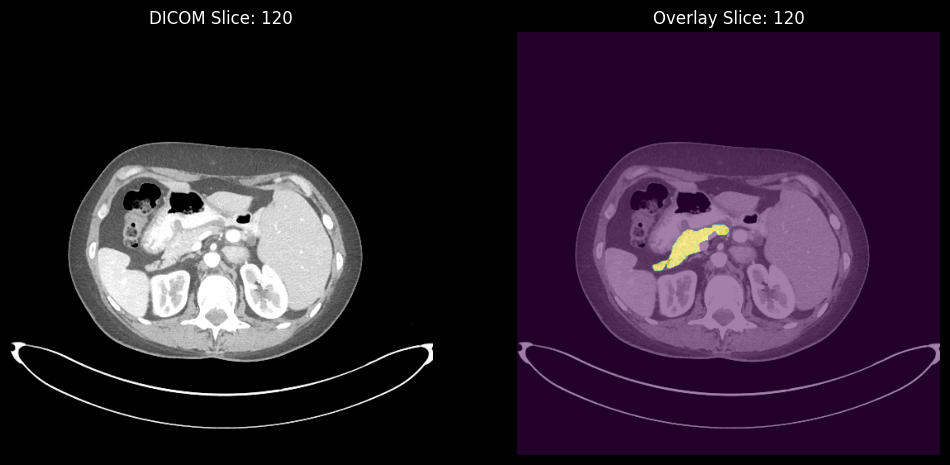

Saved DICOM slice as /home/local/ASURITE/longchao/Desktop/project/GE_health/SegmentAsYouWish/data/1Pancreas/npy/imgs/image_slice_120.npy and label as /home/local/ASURITE/longchao/Desktop/project/GE_health/SegmentAsYouWish/data/1Pancreas/npy/gts/label_slice_120.npy


In [31]:
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt
import pydicom
from pydicom import dcmread
from skimage.transform import resize
import os

def read_dicom_folder(folder_path):
    # Get all DICOM files in the folder
    dicom_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.dcm')]
    dicom_files.sort()  # Ensure files are in the correct order
    
    # Read all DICOM slices and stack them
    slices = [dcmread(dcm_file) for dcm_file in dicom_files]
    slices.sort(key=lambda x: float(x.ImagePositionPatient[2]))  # Sort by slice location
    image_data = np.stack([s.pixel_array for s in slices])
    
    return image_data

def adjust_image_slices(image_data, target_slices):
    current_slices = image_data.shape[0]
    if current_slices > target_slices:
        start_slice = (current_slices - target_slices) // 2
        adjusted_image_data = image_data[start_slice:start_slice + target_slices]
    elif current_slices < target_slices:
        pad_before = (target_slices - current_slices) // 2
        pad_after = target_slices - current_slices - pad_before
        adjusted_image_data = np.pad(image_data, ((pad_before, pad_after), (0, 0), (0, 0)), 'constant', constant_values=0)
    else:
        adjusted_image_data = image_data
    return adjusted_image_data

def show_and_save_dicom_nii_overlay(dicom_folder_path, label_nii_path, output_dir, slice_id=None, lower_bound=-240.0, upper_bound=160.0):
    # Read the DICOM folder and NIfTI file
    dicom_data = read_dicom_folder(dicom_folder_path)


    save_tag = label_nii_path.split("/")[-1].replace(".nii.gz", "").replace("label", "")

    label_sitk = sitk.ReadImage(label_nii_path)
    
    # Get the label data
    label_data = sitk.GetArrayFromImage(label_sitk)
    
    # Adjust the DICOM data to match the number of slices in the label
    dicom_data_aligned = adjust_image_slices(dicom_data, label_data.shape[0])

    # Adjust window width and level for the DICOM image
    dicom_data_pre = np.clip(dicom_data_aligned, lower_bound, upper_bound)
    dicom_data_pre = (dicom_data_pre - np.min(dicom_data_pre)) / (np.max(dicom_data_pre) - np.min(dicom_data_pre)) * 255.0
    dicom_data_pre = np.uint8(dicom_data_pre)
    
    # Select the slice
    if slice_id is None:
        slice_id = int(dicom_data_pre.shape[0] / 2)
    
    dicom_slice = dicom_data_pre[slice_id]
    label_slice = label_data[slice_id]
    
    # Resize DICOM image to match label dimensions (if necessary)
    if dicom_slice.shape != label_slice.shape:
        dicom_slice_resized = resize(dicom_slice, label_slice.shape, anti_aliasing=True)
    else:
        dicom_slice_resized = dicom_slice
    
    # Overlay the label on the DICOM slice
    overlay = dicom_slice_resized.copy()
    overlay[label_slice > 0] = 255  # Set the label area to maximum intensity (white)
    
    # Show the DICOM and overlay slices side by side
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    axes[0].imshow(np.rot90(dicom_slice_resized, 2), cmap='gray')
    axes[0].set_title(f'DICOM Slice: {slice_id}')
    axes[0].axis('off')
    
    axes[1].imshow(np.rot90(dicom_slice_resized, 2), cmap='gray')
    axes[1].imshow(np.rot90(label_slice, 2), cmap='viridis', alpha=0.5)  # Overlay with transparency
    axes[1].set_title(f'Overlay Slice: {slice_id}')
    axes[1].axis('off')
    
    plt.show()

    # Save the processed DICOM slice and label as npy files
    os.makedirs(os.path.join(output_dir, "imgs"), exist_ok=True)
    os.makedirs(os.path.join(output_dir, "gts"), exist_ok=True)
    
    img_output_path = os.path.join(output_dir, "imgs", f"image_slice_{slice_id}_{save_tag}.npy")
    label_output_path = os.path.join(output_dir, "gts", f"label_slice_{slice_id}_{save_tag}.npy")
    
    np.save(img_output_path, dicom_slice_resized)
    np.save(label_output_path, label_slice)

    print(f"Saved DICOM slice as {img_output_path} and label as {label_output_path}")

# Example usage
show_and_save_dicom_nii_overlay(
    dicom_folder_path="/home/local/ASURITE/longchao/Desktop/project/GE_health/SegmentAsYouWish/data/1Pancreas/download/Pancreas-CT-20200910/Pancreas-CT/PANCREAS_0001", 
    label_nii_path="/home/local/ASURITE/longchao/Desktop/project/GE_health/SegmentAsYouWish/data/1Pancreas/download/TCIA_pancreas_labels-02-05-2017/label0001.nii.gz",
    output_dir="/home/local/ASURITE/longchao/Desktop/project/GE_health/SegmentAsYouWish/data/1Pancreas/npy"
)


Aligned DICOM saved as NIfTI at: /home/local/ASURITE/longchao/Desktop/project/GE_health/SegmentAsYouWish/data/1Pancreas/nii/output_aligned_image.nii.gz


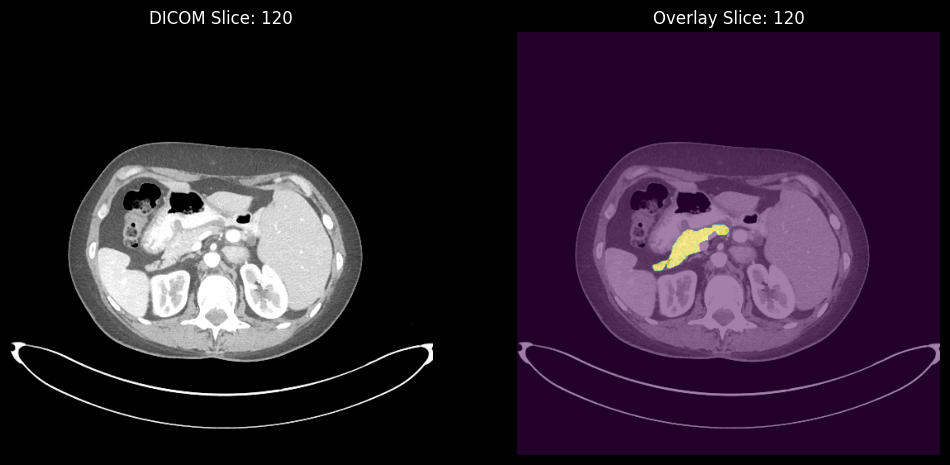

In [17]:
def show_dicom_and_nii_overlay(dicom_folder_path, label_nii_path, slice_id=None, lower_bound=-240.0, upper_bound=160.0, save=False, output_nii_path=None):
    # Read the DICOM folder and NIfTI file
    dicom_data = read_dicom_folder(dicom_folder_path)
    label_sitk = sitk.ReadImage(label_nii_path)
    
    # Get the label data
    label_data = sitk.GetArrayFromImage(label_sitk)
    
    # Adjust the DICOM data to match the number of slices in the label
    dicom_data_aligned = adjust_image_slices(dicom_data, label_data.shape[0])

    # Adjust window width and level for the DICOM image
    dicom_data_pre = np.clip(dicom_data_aligned, lower_bound, upper_bound)
    dicom_data_pre = (dicom_data_pre - np.min(dicom_data_pre)) / (np.max(dicom_data_pre) - np.min(dicom_data_pre)) * 255.0
    dicom_data_pre = np.uint8(dicom_data_pre)
    
    # Save the aligned DICOM data as a NIfTI file if requested
    if save and output_nii_path is not None:
        direction = np.array(label_sitk.GetDirection()).reshape(3, 3)
        spacing = np.array(label_sitk.GetSpacing())
        origin = np.array(label_sitk.GetOrigin())

        affine = np.eye(4)
        affine[:3, :3] = direction * spacing
        affine[:3, 3] = origin
        
        aligned_image_nifti = nib.Nifti1Image(dicom_data_pre, affine)
        nib.save(aligned_image_nifti, output_nii_path)
        print(f"Aligned DICOM saved as NIfTI at: {output_nii_path}")
    
    # Select the slice
    if slice_id is None:
        slice_id = int(dicom_data_pre.shape[0] / 2)
    
    dicom_slice = dicom_data_pre[slice_id]
    label_slice = label_data[slice_id]
    
    # Resize DICOM image to match label dimensions (if necessary)
    if dicom_slice.shape != label_slice.shape:
        dicom_slice_resized = resize(dicom_slice, label_slice.shape, anti_aliasing=True)
    else:
        dicom_slice_resized = dicom_slice
    
    # Overlay the label on the DICOM slice
    overlay = dicom_slice_resized.copy()
    overlay[label_slice > 0] = 255  # Set the label area to maximum intensity (white)
    
    # Show the DICOM and overlay slices side by side
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    axes[0].imshow(np.rot90(dicom_slice_resized, 2), cmap='gray')
    axes[0].set_title(f'DICOM Slice: {slice_id}')
    axes[0].axis('off')
    
    axes[1].imshow(np.rot90(dicom_slice_resized, 2), cmap='gray')
    axes[1].imshow(np.rot90(label_slice, 2), cmap='viridis', alpha=0.5)  # Overlay with transparency
    axes[1].set_title(f'Overlay Slice: {slice_id}')
    axes[1].axis('off')
    
    plt.show()


# Example usage:
show_dicom_and_nii_overlay(
    "/home/local/ASURITE/longchao/Desktop/project/GE_health/SegmentAsYouWish/data/1Pancreas/download/Pancreas-CT-20200910/Pancreas-CT/PANCREAS_0001/11-24-2015-PANCREAS_0001-Pancreas-18957/Pancreas-99667", 
    "/home/local/ASURITE/longchao/Desktop/project/GE_health/SegmentAsYouWish/data/1Pancreas/download/TCIA_pancreas_labels-02-05-2017/label0001.nii.gz",
    save=True,
    output_nii_path="/home/local/ASURITE/longchao/Desktop/project/GE_health/SegmentAsYouWish/data/1Pancreas/nii/output_aligned_image.nii.gz"
)


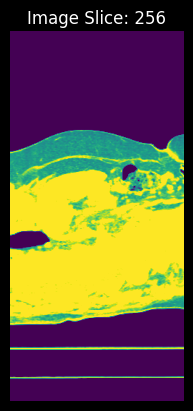

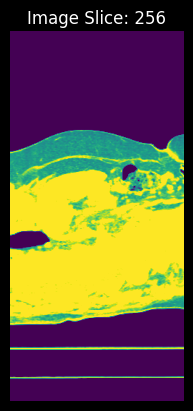

In [16]:
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt

def show_nii_slice(image_nii_path, slice_id=None, lower_bound=-240.0, upper_bound=160.0):
    # Read the NIfTI file
    image_sitk = sitk.ReadImage(image_nii_path)
    
    # Get the image data
    image_data = sitk.GetArrayFromImage(image_sitk)

    # Adjust window width and level for the image
    image_data_pre = np.clip(image_data, lower_bound, upper_bound)
    image_data_pre = (image_data_pre - np.min(image_data_pre)) / (np.max(image_data_pre) - np.min(image_data_pre)) * 255.0
    image_data_pre = np.uint8(image_data_pre)
    
    # Select the slice
    if slice_id is None:
        slice_id = int(image_data_pre.shape[0] / 2)
    
    image_slice = image_data_pre[slice_id]
    
    # Show the image slice
    plt.imshow(np.rot90(image_slice, 2), cmap='viridis')
    plt.title(f'Image Slice: {slice_id}')
    plt.axis('off')
    plt.show()

# Example usage:
show_nii_slice("/home/local/ASURITE/longchao/Desktop/project/GE_health/SegmentAsYouWish/data/1Pancreas/nii/output_aligned_image.nii.gz")



In [19]:
import os
import numpy as np
import SimpleITK as sitk
from skimage.transform import resize
from skimage import io
import cc3d

# Helper function to read DICOM files
def read_dicom_folder(folder_path):
    dicom_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.dcm')]
    dicom_files.sort()
    slices = [sitk.ReadImage(f) for f in dicom_files]
    image_data = np.stack([sitk.GetArrayFromImage(s) for s in slices])
    return image_data

# Function to adjust image slices
def adjust_image_slices(image_data, target_slices):
    current_slices = image_data.shape[0]
    if current_slices > target_slices:
        start_slice = (current_slices - target_slices) // 2
        adjusted_image_data = image_data[start_slice:start_slice + target_slices]
    elif current_slices < target_slices:
        pad_before = (target_slices - current_slices) // 2
        pad_after = target_slices - current_slices - pad_before
        adjusted_image_data = np.pad(image_data, ((pad_before, pad_after), (0, 0), (0, 0)), 'constant', constant_values=0)
    else:
        adjusted_image_data = image_data
    return adjusted_image_data

# Main function to process and save the images and labels as npy
def process_and_save_npy(dicom_folder_path, label_nii_path, output_path, image_size=1024, lower_bound=-240.0, upper_bound=160.0):
    # Create output directories if they don't exist
    os.makedirs(os.path.join(output_path, "imgs"), exist_ok=True)
    os.makedirs(os.path.join(output_path, "gts"), exist_ok=True)
    
    # Read the DICOM folder and NIfTI label file
    dicom_data = read_dicom_folder(dicom_folder_path)
    label_sitk = sitk.ReadImage(label_nii_path)
    label_data = sitk.GetArrayFromImage(label_sitk)
    
    # Align DICOM slices with label slices
    dicom_data_aligned = adjust_image_slices(dicom_data, label_data.shape[0])
    
    # Window level adjustment and normalization for the DICOM images
    dicom_data_pre = np.clip(dicom_data_aligned, lower_bound, upper_bound)
    dicom_data_pre = (dicom_data_pre - np.min(dicom_data_pre)) / (np.max(dicom_data_pre) - np.min(dicom_data_pre)) * 255.0
    dicom_data_pre = np.uint8(dicom_data_pre)
    
    # Iterate over the slices and save as npy
    for i in range(dicom_data_pre.shape[0]):
        img_slice = dicom_data_pre[i]
        label_slice = label_data[i]
        
        # Resize the image and label slices
        img_resized = resize(img_slice, (image_size, image_size), order=3, preserve_range=True, mode='constant', anti_aliasing=True)
        label_resized = resize(label_slice, (image_size, image_size), order=0, preserve_range=True, mode='constant', anti_aliasing=False)
        
        # Normalize image to [0, 1] range
        img_resized = (img_resized - np.min(img_resized)) / (np.max(img_resized) - np.min(img_resized))
        
        # Save the images and labels as npy files
        img_npy_path = os.path.join(output_path, "imgs", f"slice_{i:03d}.npy")
        label_npy_path = os.path.join(output_path, "gts", f"label_{i:03d}.npy")
        np.save(img_npy_path, img_resized)
        np.save(label_npy_path, label_resized)
        
    print(f"Processed and saved slices from {dicom_folder_path} and {label_nii_path} to {output_path}")

# Example usage
process_and_save_npy(
    dicom_folder_path="/home/local/ASURITE/longchao/Desktop/project/GE_health/SegmentAsYouWish/data/1Pancreas/download/Pancreas-CT-20200910/Pancreas-CT/PANCREAS_0001/11-24-2015-PANCREAS_0001-Pancreas-18957/Pancreas-99667",
    label_nii_path="/home/local/ASURITE/longchao/Desktop/project/GE_health/SegmentAsYouWish/data/1Pancreas/download/TCIA_pancreas_labels-02-05-2017/label0001.nii.gz",
    output_path="/home/local/ASURITE/longchao/Desktop/project/GE_health/SegmentAsYouWish/data/1Pancreas/npy/",
    image_size=1024,
    lower_bound=-240.0,
    upper_bound=160.0
)


# Save

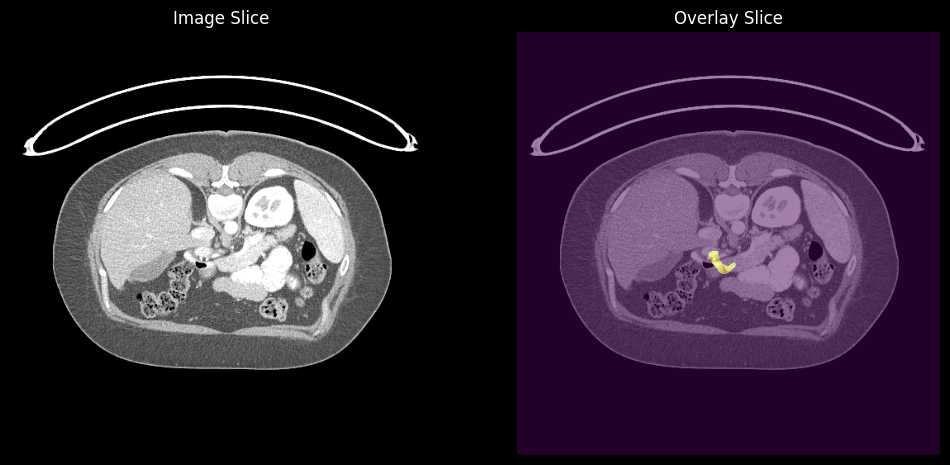

In [19]:
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt
import os
import pydicom  # <-- Add this import
from pydicom import dcmread  # <-- Add this import

def read_dicom_folder(folder_path):
    dicom_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.dcm')]
    dicom_files.sort()
    slices = [dcmread(dcm_file) for dcm_file in dicom_files]
    slices.sort(key=lambda x: float(x.ImagePositionPatient[2]))
    image_data = np.stack([s.pixel_array for s in slices])
    return image_data

def adjust_image_slices(image_data, target_slices):
    current_slices = image_data.shape[0]
    if current_slices > target_slices:
        start_slice = (current_slices - target_slices) // 2
        adjusted_image_data = image_data[start_slice:start_slice + target_slices]
    elif current_slices < target_slices:
        pad_before = (target_slices - current_slices) // 2
        pad_after = target_slices - current_slices - pad_before
        adjusted_image_data = np.pad(image_data, ((pad_before, pad_after), (0, 0), (0, 0)), 'constant', constant_values=0)
    else:
        adjusted_image_data = image_data
    return adjusted_image_data

def save_slice_as_npy(dicom_folder_path, label_nii_path, output_dir, slice_id=None, lower_bound=-240.0, upper_bound=160.0):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    dicom_data = read_dicom_folder(dicom_folder_path)
    label_sitk = sitk.ReadImage(label_nii_path)
    label_data = sitk.GetArrayFromImage(label_sitk)
    dicom_data_aligned = adjust_image_slices(dicom_data, label_data.shape[0])

    dicom_data_pre = np.clip(dicom_data_aligned, lower_bound, upper_bound)
    dicom_data_pre = (dicom_data_pre - np.min(dicom_data_pre)) / (np.max(dicom_data_pre) - np.min(dicom_data_pre)) * 255.0
    dicom_data_pre = np.uint8(dicom_data_pre)

    if slice_id is None:
        slice_id = int(dicom_data_pre.shape[0] / 2)

    dicom_slice = dicom_data_pre[slice_id]
    label_slice = label_data[slice_id]

    np.save(os.path.join(output_dir, f"image_slice_{slice_id}.npy"), dicom_slice)
    np.save(os.path.join(output_dir, f"label_slice_{slice_id}.npy"), label_slice)

    return os.path.join(output_dir, f"image_slice_{slice_id}.npy"), os.path.join(output_dir, f"label_slice_{slice_id}.npy")

def visualize_npy_slices(image_npy_path, label_npy_path):
    img_data = np.load(image_npy_path)
    label_data = np.load(label_npy_path)

    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    axes[0].imshow(img_data, cmap='gray')
    axes[0].set_title('Image Slice')
    axes[0].axis('off')

    axes[1].imshow(img_data, cmap='gray')
    axes[1].imshow(label_data, cmap='viridis', alpha=0.5)
    axes[1].set_title('Overlay Slice')
    axes[1].axis('off')

    plt.show()

# Example usage
image_npy, label_npy = save_slice_as_npy(
    dicom_folder_path="/home/local/ASURITE/longchao/Desktop/project/GE_health/SegmentAsYouWish/data/1Pancreas/download/Pancreas-CT-20200910/Pancreas-CT/PANCREAS_0006",
    label_nii_path="/home/local/ASURITE/longchao/Desktop/project/GE_health/SegmentAsYouWish/data/1Pancreas/download/TCIA_pancreas_labels-02-05-2017/label0006.nii.gz",
    output_dir="/home/local/ASURITE/longchao/Desktop/project/GE_health/SegmentAsYouWish/data/1Pancreas/npy2/",
    slice_id=120
)

visualize_npy_slices(image_npy, label_npy)



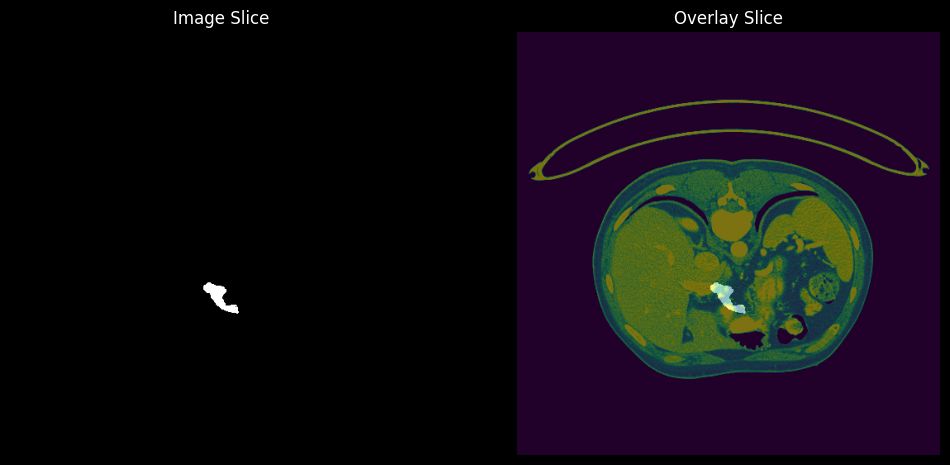

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Load the saved .npy files
image_slice = np.load("/home/local/ASURITE/longchao/Desktop/project/GE_health/SegmentAsYouWish/data/1Pancreas/npy/imgs/image_0001.npy")

label_slice = np.load("/home/local/ASURITE/longchao/Desktop/project/GE_health/SegmentAsYouWish/data/1Pancreas/npy/gts/label_0001.npy")

# Visualize the image and overlay the label
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(image_slice, cmap='gray')
axes[0].set_title('Image Slice')
axes[0].axis('off')

axes[1].imshow(image_slice, cmap='gray')
axes[1].imshow(label_slice, cmap='viridis', alpha=0.5)
axes[1].set_title('Overlay Slice')
axes[1].axis('off')

plt.show()
